![alt text](path_to_banner_image.jpg)
# Title
Author: Elijah Lopez

## Overview


## Business Problem


## Data


### Summary of Data Findings


## Potential Routes of Analysis


## Chosen Metrics for Analysis


## Data Cleaning & Feature Engineering

## Analysis

### Direction 1


#### Direction 1 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 1:

### Direction 2


#### Direction 2 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 2:

### Direction 3

#### Direction 3 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 3:

## Results


### Direction 1
* 


### Direction 2
* 


### Direction 3
* 

## Conclusions
This analysis leads to three recommendations.

1. 

2. 

3. 

## Next Steps
* 

## Resources
* [QQQ](https://www.invesco.com/qqq-etf/en/performance.html) - ETF Tracked
* [Yahoo Finance](https://finance.yahoo.com/) - Stock-related data
* [FRED](https://fred.stlouisfed.org/) - Economic-related data

[*********************100%***********************]  1 of 1 completed


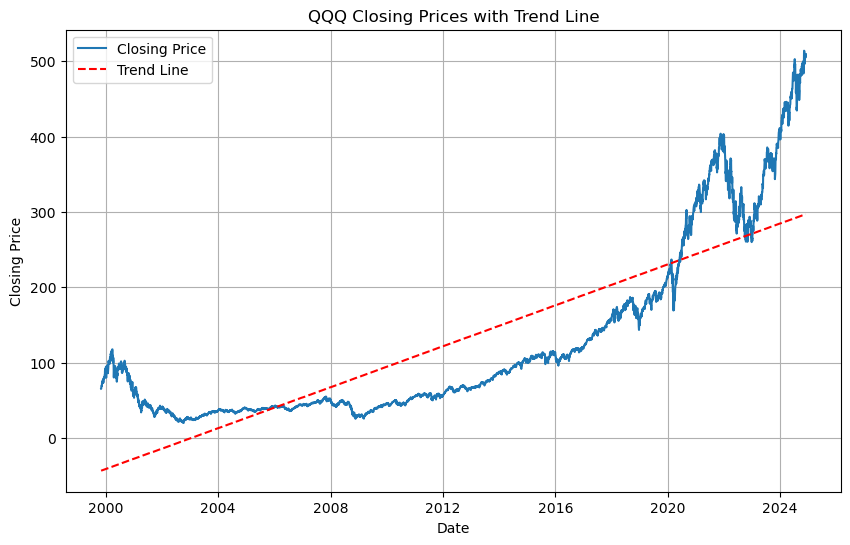

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Set pandas option to display all rows
pd.set_option('display.max_rows', None)


# Fetch data for the specified ticker
ticker = 'QQQ'
stock_data = yf.download(ticker, start='1999-11-01', end='2024-11-30')


# Print the data
# print(stock_data)


# Create the plot
plt.figure(figsize=(10, 6))


# Plot the closing prices
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price')


# Fit a linear trend line
x = np.arange(len(stock_data))  # Create an array of integers from 0 to the length of the DataFrame
y = stock_data['Close'].values  # Extract closing prices as a NumPy array
trend = np.polyfit(x, y, 1)  # Fit a linear trend line (1st-degree polynomial)
trend_line = np.polyval(trend, x)  # Compute trend line values


# Plot the trend line
plt.plot(stock_data.index, trend_line, label='Trend Line', color='red', linestyle='--')


# Customize the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{ticker} Closing Prices with Trend Line')
plt.legend()
plt.grid(True)  # Optional: add grid for better readability


# Show the plot
plt.show()


In [140]:
import yfinance as yf

# Fetch the data
ticker = 'QQQ'
stock_data = yf.download(ticker, start='1999-11-01', end='2024-11-30')

# Reset index and set 'Date' as the new index
stock_data.reset_index(inplace=True)
stock_data.set_index('Date', inplace=True)

# Flatten columns by removing the 'Ticker' level (second level of the MultiIndex)
stock_data.columns = stock_data.columns.get_level_values(0)  # Get the first level, which contains the price types

# Select the relevant columns
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Remove 'Price' column label
stock_data.columns.name = None

# Display the first few rows
stock_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-11-01,65.750000,66.53125,65.320312,65.406250,55.613441,9681800
1999-11-02,65.750000,66.56250,65.195312,65.445312,55.646679,12834800
1999-11-03,66.375000,67.12500,66.187500,66.750000,56.755985,18752600
1999-11-04,67.679688,67.81250,66.781250,67.500000,57.393696,20048600
1999-11-05,68.875000,69.21875,68.187500,68.187500,57.978279,15134600


In [ ]:
stock_data.rename(columns={'Adj Close': 'adj_close'}, inplace=True)
stock_data.columns = stock_data.columns.str.lower()
stock_data.head()

,Open,High,Low,Close,adj_close,Volume
Date,,,,,,
1999-11-01,65.750000,66.53125,65.320312,65.406250,55.613441,9681800
1999-11-02,65.750000,66.56250,65.195312,65.445312,55.646679,12834800
1999-11-03,66.375000,67.12500,66.187500,66.750000,56.755985,18752600
1999-11-04,67.679688,67.81250,66.781250,67.500000,57.393696,20048600
1999-11-05,68.875000,69.21875,68.187500,68.187500,57.978279,15134600


In [164]:
stock_data.index.name = stock_data.index.name.lower()
stock_data.head()

,open,high,low,close,adj_close,volume
date,,,,,,
1999-11-01,65.750000,66.53125,65.320312,65.406250,55.613441,9681800
1999-11-02,65.750000,66.56250,65.195312,65.445312,55.646679,12834800
1999-11-03,66.375000,67.12500,66.187500,66.750000,56.755985,18752600
1999-11-04,67.679688,67.81250,66.781250,67.500000,57.393696,20048600
1999-11-05,68.875000,69.21875,68.187500,68.187500,57.978279,15134600


In [144]:
from fredapi import Fred
import pandas as pd

# Set up FRED API
fred = Fred(api_key='51f2961dd04afe20a0da350a4454eeb6')

# Define FRED series for required economic indicators
series_ids = {
    'interest_rate': 'DFF',            # Federal Funds Rate
    'gdp_growth': 'A191RL1Q225SBEA',   # Real GDP Growth
    'inflation_rate': 'CPIAUCSL',      # Consumer Price Index (CPI)
    'unemployment_rate': 'UNRATE',     # Unemployment Rate
    'consumer_sentiment': 'UMCSENT'    # Consumer Sentiment Index
}

# Fetch and consolidate data
data = {}
for key, series_id in series_ids.items():
    data[key] = fred.get_series(series_id)

# Combine into a single DataFrame
economic_data = pd.concat(data, axis=1)
economic_data.index.name = 'date'

economic_data.head()

,interest_rate,gdp_growth,inflation_rate,unemployment_rate,consumer_sentiment
date,,,,,
1947-01-01,NaN,NaN,21.48,NaN,NaN
1947-02-01,NaN,NaN,21.62,NaN,NaN
1947-03-01,NaN,NaN,22.00,NaN,NaN
1947-04-01,NaN,-1.0,22.00,NaN,NaN
1947-05-01,NaN,NaN,21.95,NaN,NaN


In [ ]:
# Inspect date range for overlapping period of QQQ data to see if
# backfilling is reasonable. Because values are reported regularly during this
# time I chose to continue with approach.
overlapping_economic_data = economic_data.loc['1999-11-01' : '2024-11-30']
# overlapping_economic_data     #Scrolled through entire df but commented out for readability
overlapping_economic_data.head()

In [ ]:
economic_data.fillna(method='bfill')
economic_data.head()

,interest_rate,gdp_growth,inflation_rate,unemployment_rate,consumer_sentiment
date,,,,,
1947-01-01,1.13,-1.0,21.48,3.4,86.2
1947-02-01,1.13,-1.0,21.62,3.4,86.2
1947-03-01,1.13,-1.0,22.00,3.4,86.2
1947-04-01,1.13,-1.0,22.00,3.4,86.2
1947-05-01,1.13,-0.8,21.95,3.4,86.2


In [165]:
merged_df = stock_data.join(economic_data, how='left', on='date')
merged_df.head()

,open,high,low,close,adj_close,volume,interest_rate,gdp_growth,inflation_rate,unemployment_rate,consumer_sentiment
date,,,,,,,,,,,
1999-11-01,65.750000,66.53125,65.320312,65.406250,55.613441,9681800,5.38,NaN,168.4,4.1,107.2
1999-11-02,65.750000,66.56250,65.195312,65.445312,55.646679,12834800,5.18,NaN,NaN,NaN,NaN
1999-11-03,66.375000,67.12500,66.187500,66.750000,56.755985,18752600,5.21,NaN,NaN,NaN,NaN
1999-11-04,67.679688,67.81250,66.781250,67.500000,57.393696,20048600,5.27,NaN,NaN,NaN,NaN
1999-11-05,68.875000,69.21875,68.187500,68.187500,57.978279,15134600,5.14,NaN,NaN,NaN,NaN
